# Astro Project

In [12]:
# Imports and parameter setting

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
plt.style.use('seaborn-notebook')
width = 3.404
height = width * 1
params = {
    'xtick.labelsize':8,
    'ytick.labelsize':8,
    'axes.labelsize':8,
    'legend.fontsize':8,
    'font.family':'serif',
}
mpl.rcParams.update(params)

In [13]:
# Get data
try:
    hdulist = fits.open('data/m35.fit')
except FileNotFoundError:
    print('Data file missing')

In [14]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   36 / width of table in bytes                        
NAXIS2  =                 1150 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                    9 / number of columns                              
EXTNAME = 'C:\Users\drumm\Dropbox\m35.fit#1' / table name                       
TTYPE1  = '_RAJ2000'           / label for column 1                             
TFORM1  = 'E       '           / format for column 1                            
TUNIT1  = 'deg     '           / units for column 1                             
TTYPE2  = '_DEJ2000'        

In [15]:
data = pd.DataFrame(hdulist[1].data)

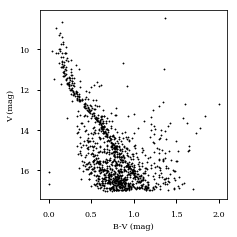

In [16]:
# plt.gca().invert_yaxis()
# plt.plot(data['B-V'], data['Vmag'], 'o', markersize=2)
ax = data.plot.scatter(x='B-V', y='Vmag', s=2, c='k')
ax.invert_yaxis()
ax.set_xlabel('B-V (mag)')
ax.set_ylabel('V (mag)')


plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-v.pdf')

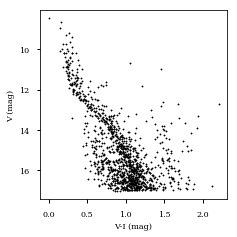

In [17]:
ax = data.plot.scatter(x='V-I', y='Vmag', s=2, c='k')
ax.invert_yaxis()
ax.set_xlabel('V-I (mag)')
ax.set_ylabel('V (mag)')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-i.pdf')

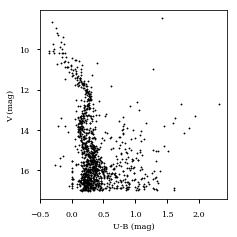

In [18]:
ax = data.plot.scatter(x='U-B', y='Vmag', s=2, c='k')
ax.invert_yaxis()
ax.set_xlabel('U-B (mag)')
ax.set_ylabel('V (mag)')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/u-b.pdf')

In [19]:
hdulist.close()